# Deep Neural Networks #

Neural networks are machine learning algorithms are inspired by the neural pathways in the human brain. The idea is that neurons take in information and pass it along pathways. These neurons work together to create human cognition.

In a neural network model, there are nodes which take in information and pass it along to other nodes. We refer to the organization of nodes as "layers" in the model, so information is passed between nodes in different layers. Combining information across layers allows the model to learn complex patterns within the data. 

These layers have specific names. The first is the input layer, which inputs the data. There is one node for each input feature we are interested in. For example, in a model built to predict the prices of a house, we might have features such as the number of bedrooms, the number of bathrooms, square footage, etc. Each of these would be one input feature into the model. The final layer is referred to as the output layer and returns the desired output (e.g., predicted house price, classification label). The layers between are referred to as the hidden layers and there can be any number of these. The more there are, the "deeper" the network is said to be. A diagram of a neurla network can be seen below below ([source](https://www.bmc.com/blogs/deep-neural-network/)).

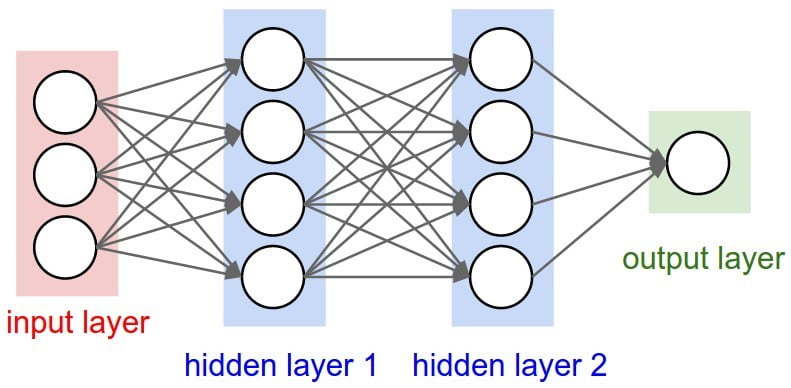

As can be seen, the layers are connected by edges, representing the flow of information from one node to another. Thus the edges from the input layer to the second layer in the diagram indicate data from the nodes in the first layer sent as inputs to each node in the next layer (note in reality there is an additional gate to determine what information exactly is passed, but we'll discuss that later). Associated with each edge in the network are weights, which indicate the importance placed by the destination node (node the arrow is pointed to) on the information flowing from the source node (node the arrow originates from). The network learns patterns in the data by learning to adjust these weighs accordingly.

## Perceptron Model ##

### Overview ###

A very simple early neural network model is the Perceptron, which can have one or more layers. The former is referred to as a single-layer perceptron and the latter, a multi-layer percepton. In this example, I will discuss the single-layer perceptron.

The perceptron's input layer has one node for each feature input to the model. In the house example from above there would be one for number of rooms, one for square footage, etc. The nodes consisting of the input layer are then all connected to a single node, which is the output layer (remember, we're just studying the single-layer case). This node combines the information from the input layer by a weighted sum. Thus, for a data set with $m$ features, we get:

<center>$z = \sum_{i=1}^m w_ix_i$</center>

There is usually a bias term as well which is added to the final total sum.

Each node then determines what information it will pass onto the next layer. It does so by calling on an activation function. This is essentially like the node deciding if it's information meets a required threshold (is it useful/good enough to pass on). In this implementation we'll focus on the binary classification case and use the Heaviside activation function, where the node returns 1 if the weighted sum is greater than or equal to 0 and 0 otherwise.

#### Training ####

The model is trained by sending training data through the model in many runs. All the data is sent through the perception and the training loss is calculated. In this case, we use a simple loss function with loss equal to the difference between the predicted labels and true labels. By using the loss, we can adjust the weights we learned for the model to try and get a model that performs better on the data. Running all the training data through is referred to as an epoch.

To adjust the weights, we use the calculated loss to adjust the the weights. The key is to use the loss to adjust the weight incrementally. We don't want to over adjust and correct the model too far in the other direction. For example, if the model outputted the value 0.8 and we want the output to be 0, we don't want to correct the weights too far to accidentaly output -1 next time. We do this by controling the adjustment with the learning rate. The full calculation of weight adjustment is:

<center>$W^{t+1} = W^t + lr * loss * X$</center>

where $W$ is the weights, lr is the learning rate, and X is the input data.


Note: this information was written with the aid of [this tutorial](https://www.geeksforgeeks.org/what-is-perceptron-the-simplest-artificial-neural-network/#).

### Creating the Model ###

Below, I will implement a single-layer perception from scratch. It will be a general model, which I will apply to a data set in the next step.

In [81]:
import numpy as np

class PerceptronModel:
    
    # num_features: number of features in the data set
    # lr: learning rate for training
    def __init__(self, num_feats, lr, weights=None):
        self.lr = lr
        if weights == None:
            # generate initial weights randomly and add a bias term
            self.weights = np.random.rand(num_feats+1)
        else:
            # instantiate an existing model
            self.weights = weights
    
    # calculate weighted sum
    def forward(self, data):
        z = np.sum((self.weights[:-1] * data), axis=1)
        z += self.weights[-1].T
            
        return z
    
    # calculate Heaviside activation
    def activation(self, Z):
        activated = []
        
        for item in Z:
            if item >= 0:
                activated.append(1)
            else:
                activated.append(0)
        
        return activated
                
    # calculate the loss
    def loss(self, pred_labels, true_labels):
        
        return pred_labels - true_labels
    
    # train the network
    def train(self, train_data, train_labels, epochs):
        for _ in range(epochs):
            for i in range(len(train_data)):
                Z = self.forward([train_data[i]])
                output = self.activation(Z)
                
                # calculate loss of prediction and update weights
                loss = self.loss(output, train_labels[i])
                if loss > 0:
                    self.weights[:-1] += (self.lr * loss * train_data[i])
                    self.weights[-1] += (self.lr * loss)
        
        return self.weights
            
    # predict the label for a data point or multiple data points
    def predict(self, data):
        z = self.forward(data)
        output = self.activation(z)
        
        return output

### Implementing the Model ###


I'll test the model on the scikit-learn built-in breast cancer data set. This is a classification problem, so it will work with the activation function chosen. The data set has 2 classes and 30 features.

First, I'll load the data set and split it into a training and test set. Then I'll train a perceptron model on it.

In [83]:
from sklearn import datasets, model_selection

data = datasets.load_breast_cancer()
X = data['data']
Y = data['target']
features = data['feature_names']

X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X, Y, train_size=0.7, random_state=1)

# create a Perceptron model with a learning rate of 0.001 and train for 100 epochs
model = PerceptronModel(len(features), 0.01)
weights = model.train(X_train, Y_train, 100)

print('Weights:', weights[:-1])
print('Bias:', weights[-1])

Weights: [2.64121874e+03 3.27406474e+03 1.74462813e+04 1.50194815e+05
 1.55829571e+01 2.18652543e+01 2.44649453e+01 1.34891409e+01
 2.91570011e+01 9.84872733e+00 9.46019636e+01 1.82465824e+02
 6.66810625e+02 1.15559608e+04 1.74131650e+00 5.21988800e+00
 6.40916376e+00 2.38528698e+00 3.57735249e+00 1.08841558e+00
 3.20977599e+03 4.41627760e+03 2.14716052e+04 2.20589211e+05
 2.17594705e+01 5.64759192e+01 6.81372563e+01 2.77407017e+01
 4.82373996e+01 1.39262690e+01]
Bias: 149.14318844357192


### Evaluating the Model ###

I will use the testing data set to evaluate the performance of the model. I'll measure this by looking at several metrics including accuracy, precision, and recall.

In [86]:
from sklearn import metrics

Y_pred = model.predict(X_test)

acc = metrics.accuracy_score(Y_test, Y_pred)
print('Accuracy:', acc)
precision = metrics.precision_score(Y_test, Y_pred)
print('Precision:', precision)
recall = metrics.recall_score(Y_test, Y_pred)
print('Recall:', recall)
print()

cmatrix = metrics.confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix:')
print(cmatrix)

Accuracy: 0.631578947368421
Precision: 0.631578947368421
Recall: 1.0

Confusion Matrix:
[[  0  63]
 [  0 108]]


The accuracy of the model appears to be relatively low --- we wouldn't want to use it as an actual classifier. This indicates the model is not great at identifying the cancer cases. 

In particular, when we look at precision and recall scores, we find the model is not very precise, though it has perfect recall. This indicates the model will not incorrectly label a benign case as malignant. Thus, if a person if a person does not truly have cancer, they won't accidentally be told they do have it. On the other hand, the precision score indicates the model is prone to labeling malignant cases as benign. This means that if I do have cancer, there's a chance the model will tell me I don't. 

Thus, for cancer screening this would be a poor model, since there's a chance it would incorrectly tell a person they do not have cancer when they in fact do. And as a result, someone may not get the treatment they need. In cases like this, it can often be better to have higher precision at the expense of recall. If the model occasionally tells someone they may have cancer, additional screening can occur. And in then the false negative would be identified and the person cleared without too many reprecussions (maybe a could of stressed days while waiting for results, but better than the alternative of untreated illness).

Looking at the below confusion matrix we get some additional insight into the model. We find that in all the test cases, the model predicted belonging to class 1 (benign), when in actuality there is a split between malignant (0) and bengin (1) cases, though it is skewed to the benign examples. It is possible the model has learned to just predict the bengin case in all examples, though we'd likely need some further investigating to confirm.

| | Predict 0 | Predict 1|
| ------ | ------ | ------ |
| Actual 0 | 0 | 63 | 
| Actual 1| 0 | 108 |

In the single-layer case, the model can learn linearly separable data. However, more complicated patterns require a deeper network (more hidden layers).


## Deep Neural Network ##

A simple example of using a neural network to predict California housing prices (built-in scikit-learn data set). The network is a simple 3-layer network implemented in PyTorch with REeLU activation functions and mean-squared error loss. The model uses the Adam optimizer.

In [ ]:
import torch
from torch import nn

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.model_stack = nn.Sequential(
            nn.Linear(8, 12),
            nn.ReLU(),
            nn.Linear(12, 8),
            nn.ReLU(),
            nn.Linear(8, 1)
        )
    
    def forward(self, x):
        vals = self.model_stack(x)
        return vals